In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import math
import arviz as az
import itertools

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
x = np.array([2, 4.5, 5, 5.5])
print(x)

[2.  4.5 5.  5.5]


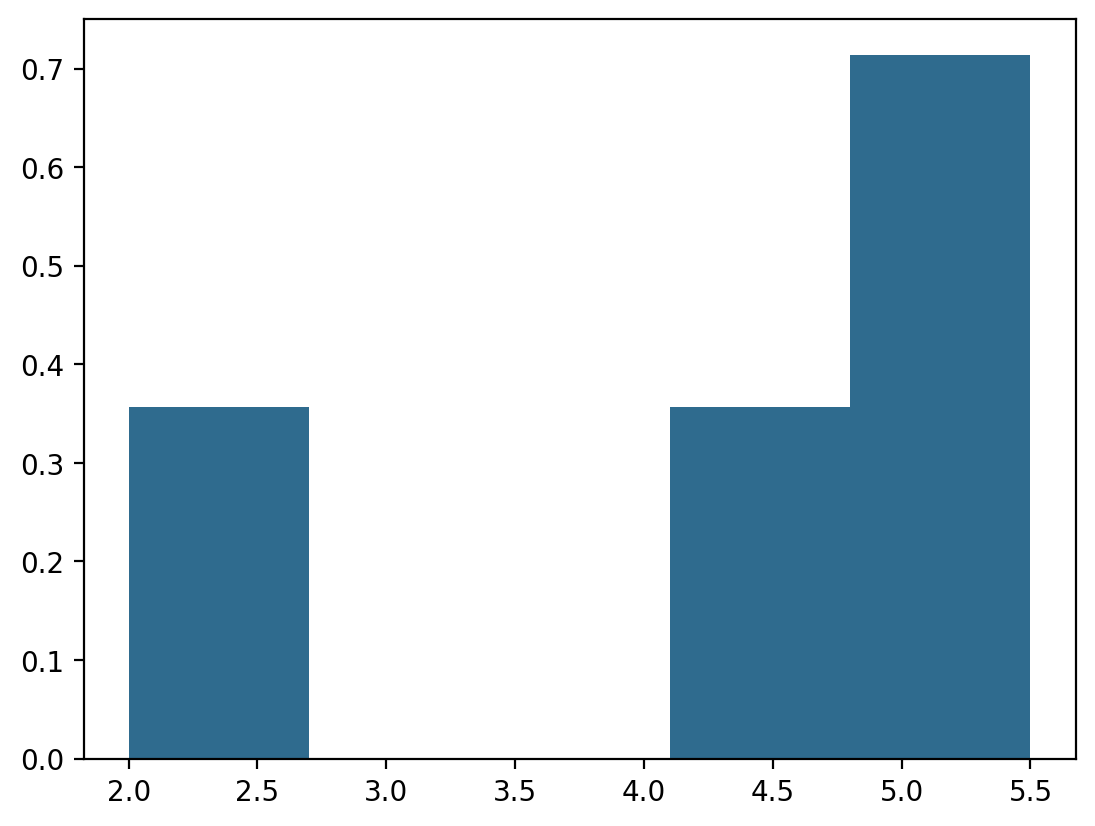

In [4]:
plt.hist(x, bins=5, density=True, color="C1");

In [5]:
(np.mean(x), np.var(x, ddof=0))

(4.25, 1.8125)

In [6]:
# Create an array with all the pairs of possible values
samples = np.array(list(itertools.product(x, repeat=2)))
print(samples)

[[2.  2. ]
 [2.  4.5]
 [2.  5. ]
 [2.  5.5]
 [4.5 2. ]
 [4.5 4.5]
 [4.5 5. ]
 [4.5 5.5]
 [5.  2. ]
 [5.  4.5]
 [5.  5. ]
 [5.  5.5]
 [5.5 2. ]
 [5.5 4.5]
 [5.5 5. ]
 [5.5 5.5]]


In [7]:
# total number of samples
len(list(itertools.product(x, x)))

16

In [8]:
# Create an array with the mean of each sample
means = np.mean(samples, axis=1)
print(means)

[2.   3.25 3.5  3.75 3.25 4.5  4.75 5.   3.5  4.75 5.   5.25 3.75 5.
 5.25 5.5 ]


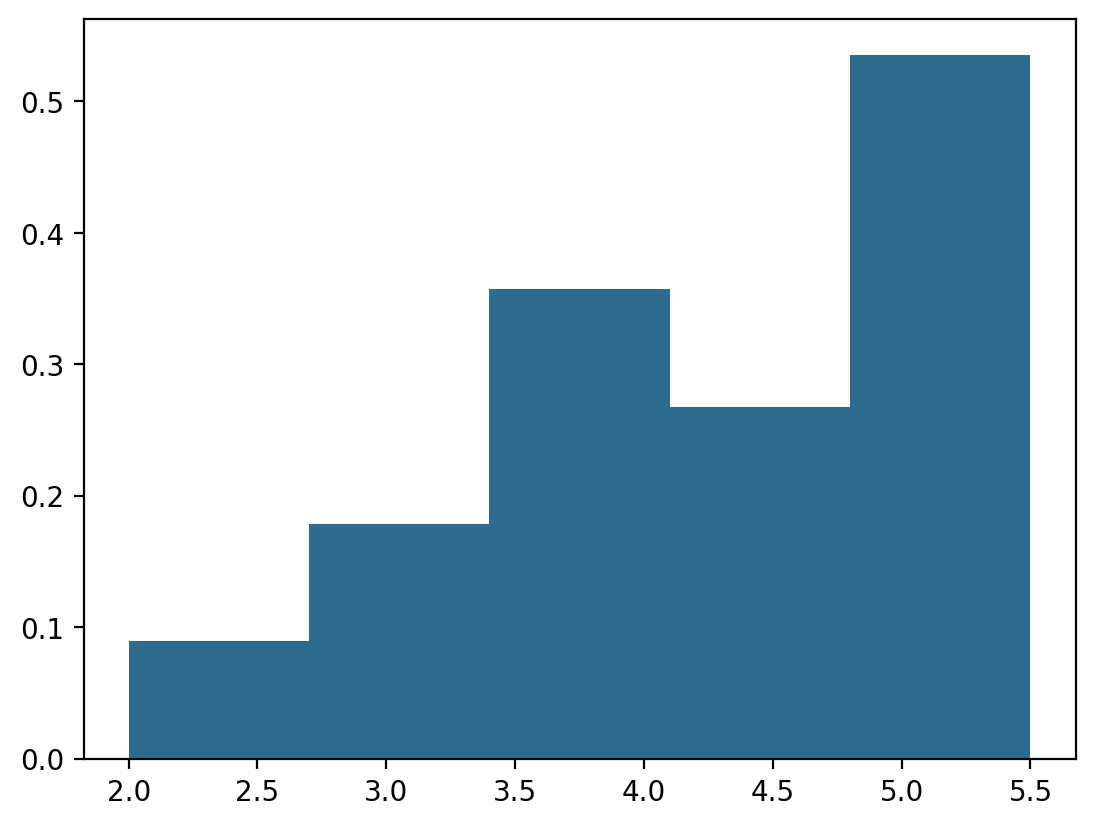

In [9]:
plt.hist(means, bins=5, color="C1", density=True);

In [10]:
df = pd.DataFrame()
df["Samples"] = list(itertools.product(x, x))
df["x_bar"] = np.mean(list(itertools.product(x, x)), axis=1)
df

,Samples,x_bar
0,"(2.0, 2.0)",2.00
1,"(2.0, 4.5)",3.25
2,"(2.0, 5.0)",3.50
3,"(2.0, 5.5)",3.75
4,"(4.5, 2.0)",3.25
5,"(4.5, 4.5)",4.50
6,"(4.5, 5.0)",4.75
7,"(4.5, 5.5)",5.00
8,"(5.0, 2.0)",3.50
9,"(5.0, 4.5)",4.75


In [11]:
(np.mean(x), np.mean(means))

(4.25, 4.25)

In [12]:
np.var(x, ddof=0) / 2

0.90625

In [13]:
np.var(means, ddof=0) 

0.90625

In [14]:
observed_sample = np.array([5, 5.5])
print(observed_sample)

[5.  5.5]


In [15]:
sample_mean = np.mean(observed_sample)
print(sample_mean)

5.25


In [16]:
sample_sd = np.std(observed_sample, ddof=1)
print(sample_sd)

0.3535533905932738


In [17]:
np.std(x, ddof=0)

1.346291201783626

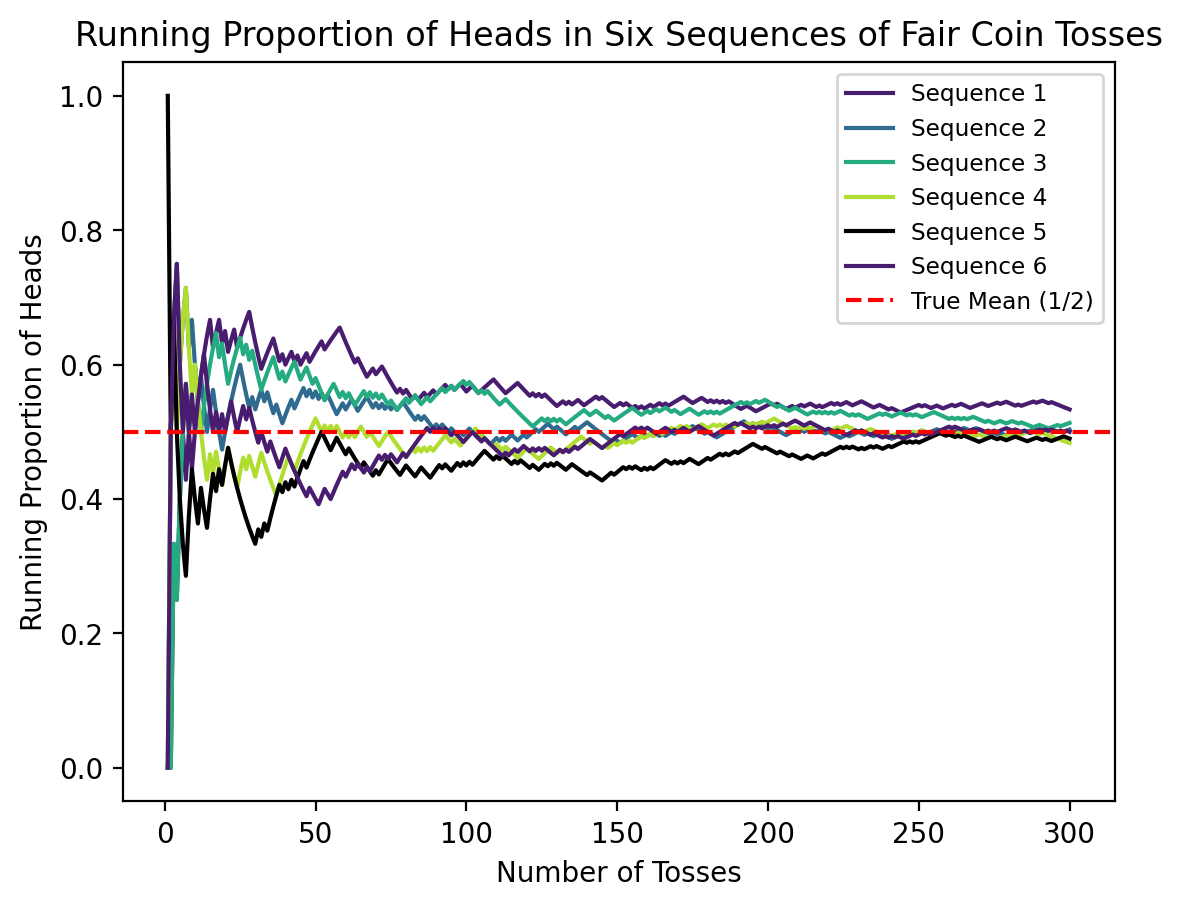

In [18]:
# Number of sequences
num_sequences = 6
# Number of tosses
num_tosses = 300
# Initialize a figure
plt.figure()

# Loop through each sequence
for i in range(num_sequences):
    
    # Generate a sequence of fair coin tosses (Heads=1, Tails=0)
    coin_tosses = np.random.choice([0, 1], num_tosses)
    
    # Calculate the running proportion of Heads
    running_proportion = np.cumsum(coin_tosses) / np.arange(1, num_tosses + 1)
    
    # Plot the running proportion as a function of the number of tosses
    plt.plot(np.arange(1, num_tosses + 1), running_proportion, label=f'Sequence {i+1}')

# Plotting the true mean (1/2)
plt.axhline(y=0.5, color='r', linestyle='--', label='True Mean (1/2)')

# Adding labels and title
plt.xlabel('Number of Tosses')
plt.ylabel('Running Proportion of Heads')
plt.title('Running Proportion of Heads in Six Sequences of Fair Coin Tosses')
plt.legend()
plt.legend(fontsize='small')
plt.show()

In [19]:
# parameters of the beta distribution
a=2
b=1

def plotSamples(n):
    # create normal distribution with mean and standard deviation of the beta
    mu = a / (a+b)
    sigma = math.sqrt( a*b / (a+b)**2 / (a+b+1) )
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma/math.sqrt(n))

    # find sample means from samples of "ramped" beta distribution
    values = []
    for i in range(n):
        v = []
        for j in range(50000):
          v.append(np.random.beta(a,b))
        values.append(v)
    df = pd.DataFrame(values)
    sample_means = df.mean(axis=0)

    # plot a histogram of the distribution of sample means, together 
    # with the population distribution
    fig, ax = plt.subplots(sharex=True)
    sns.histplot(sample_means, color="C2")
    ax2 = ax.twinx()
    sns.lineplot(x=x,y=y, ax=ax2, color='C0')
    ax.set(yticklabels=[])
    ax2.set(yticklabels=[])
    ax.set(ylabel=None)
    ax2.set(ylabel=None)
    ax.tick_params(left=False)
    ax2.tick_params(right=False)
    ax.set_title("Ampiezza campionaria = " + str(n))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

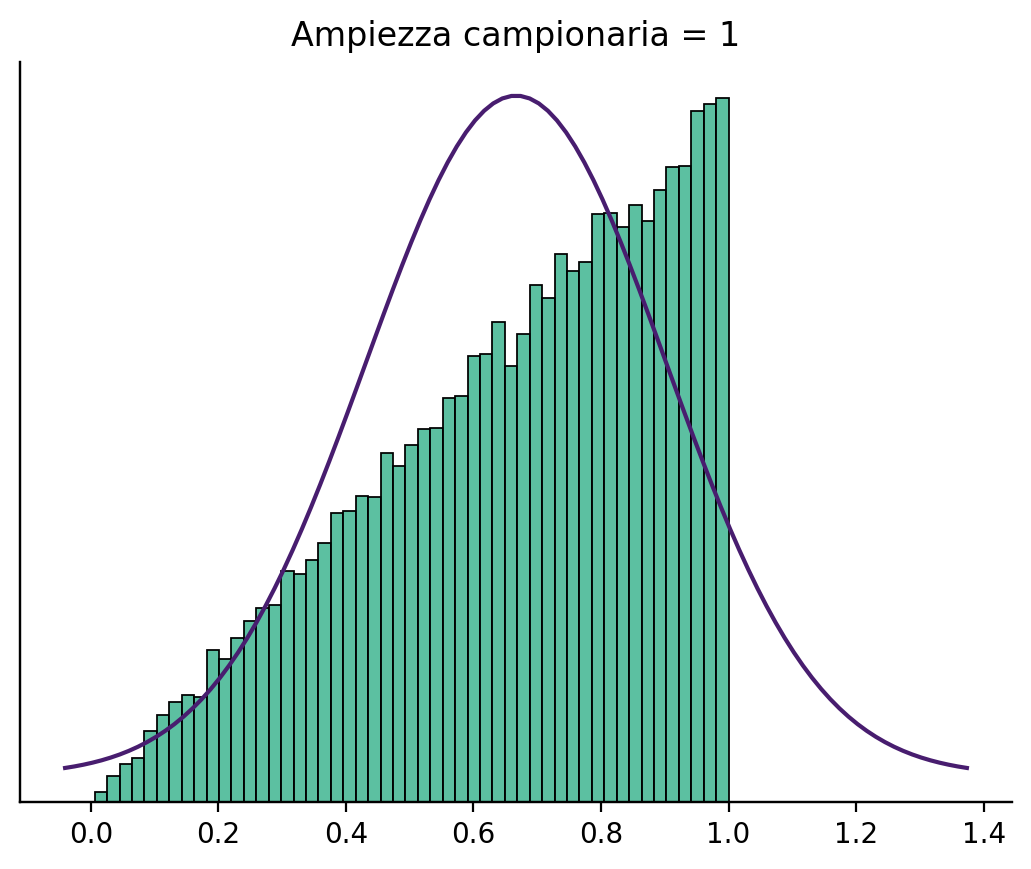

In [20]:
plotSamples(1)

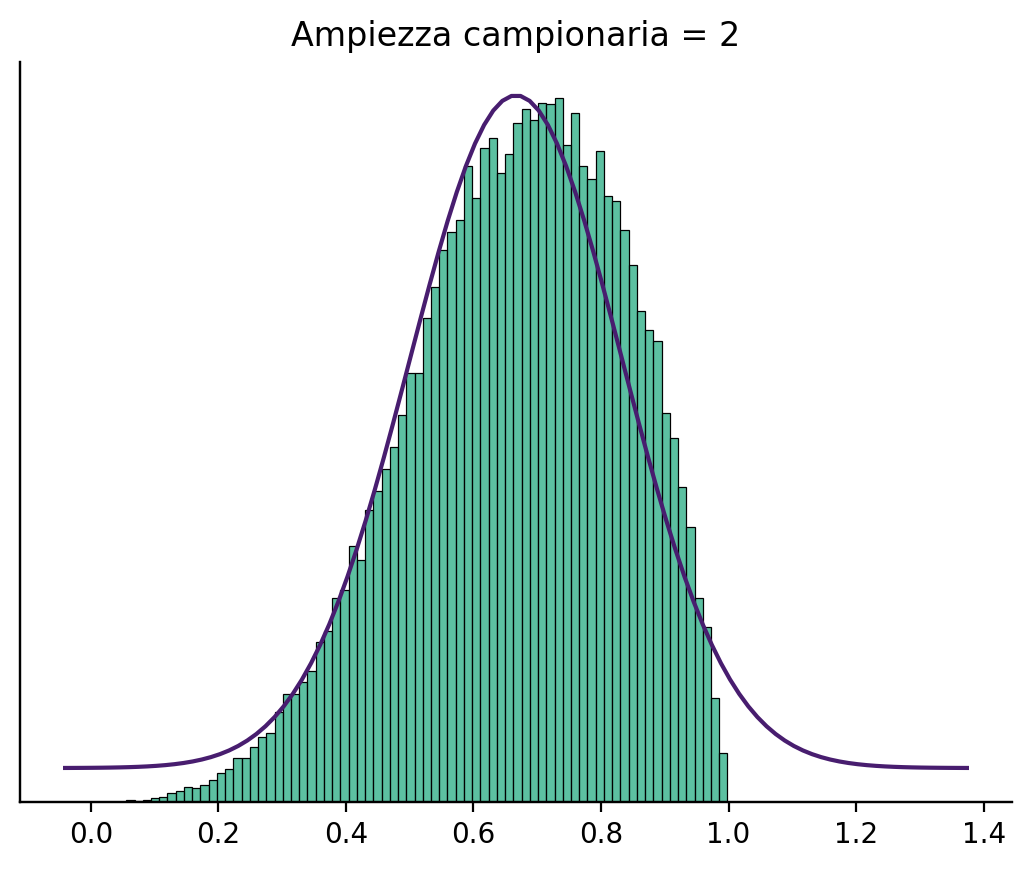

In [21]:
plotSamples(2)

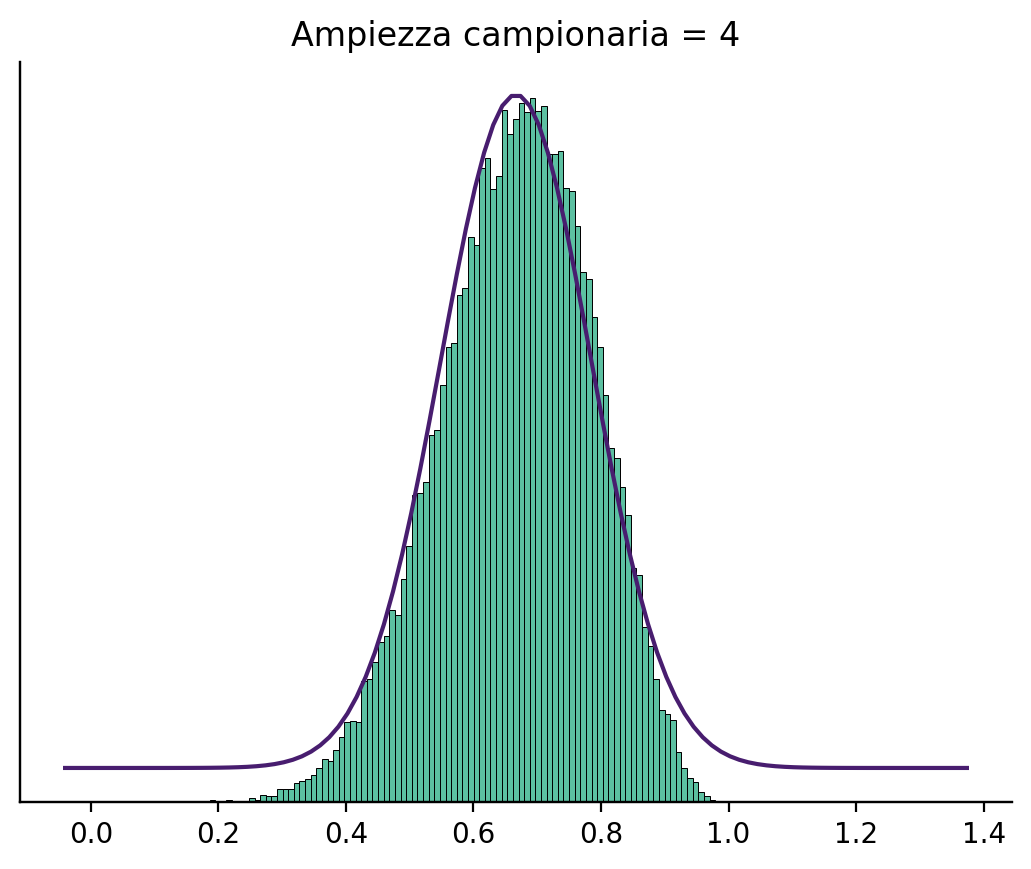

In [22]:
plotSamples(4)

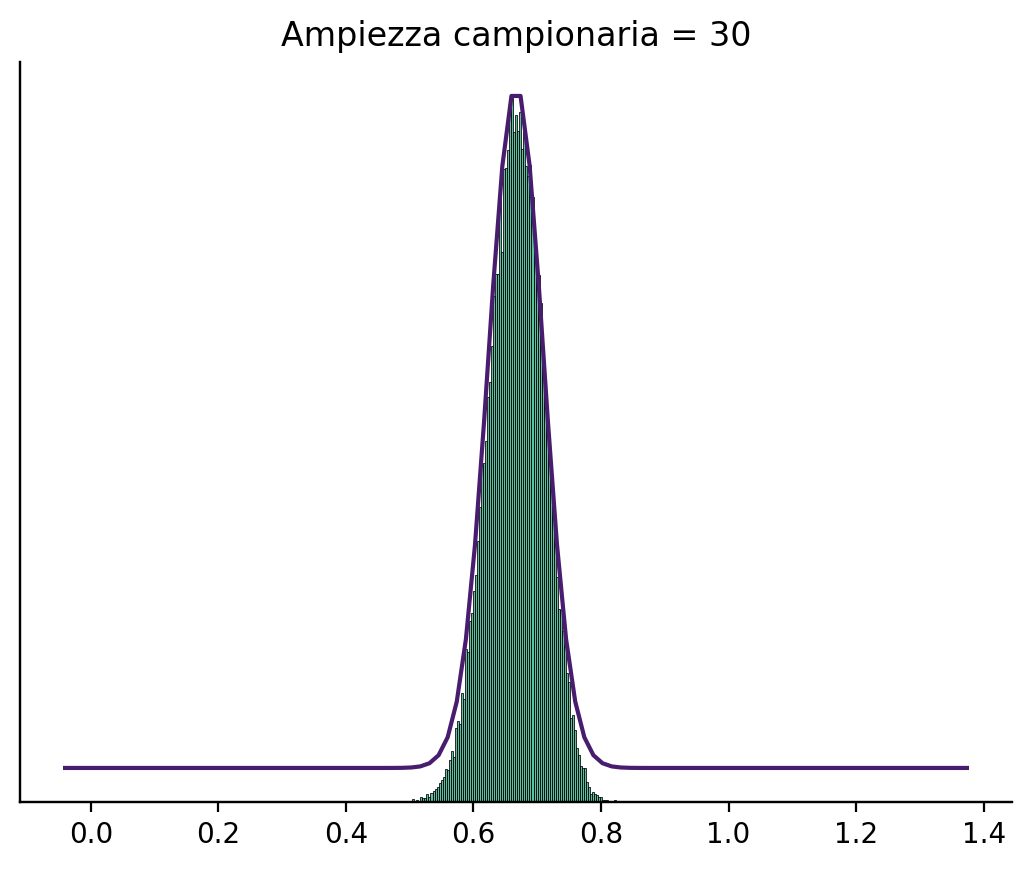

In [23]:
plotSamples(30)

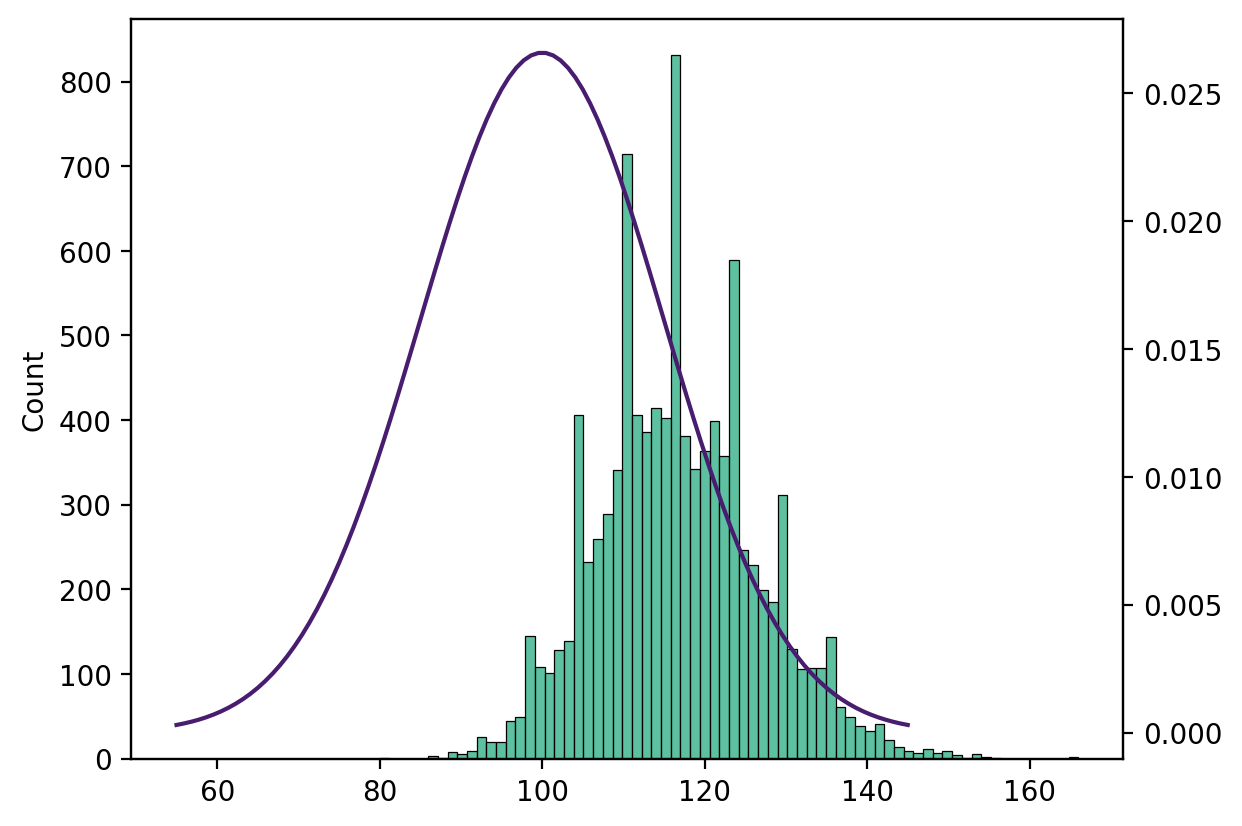

In [24]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find the maximum score for each experiment
sample_maxes = []
for i in range(1, 10000):
    sample_max = max(np.random.normal(loc=100, scale=15, size=5).astype(int))
    sample_maxes.append(sample_max)

# plot a histogram of the distribution of sample maximums, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_maxes, color="C2", ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x, y=y, ax=ax2, color="C0");

182.6155009387897

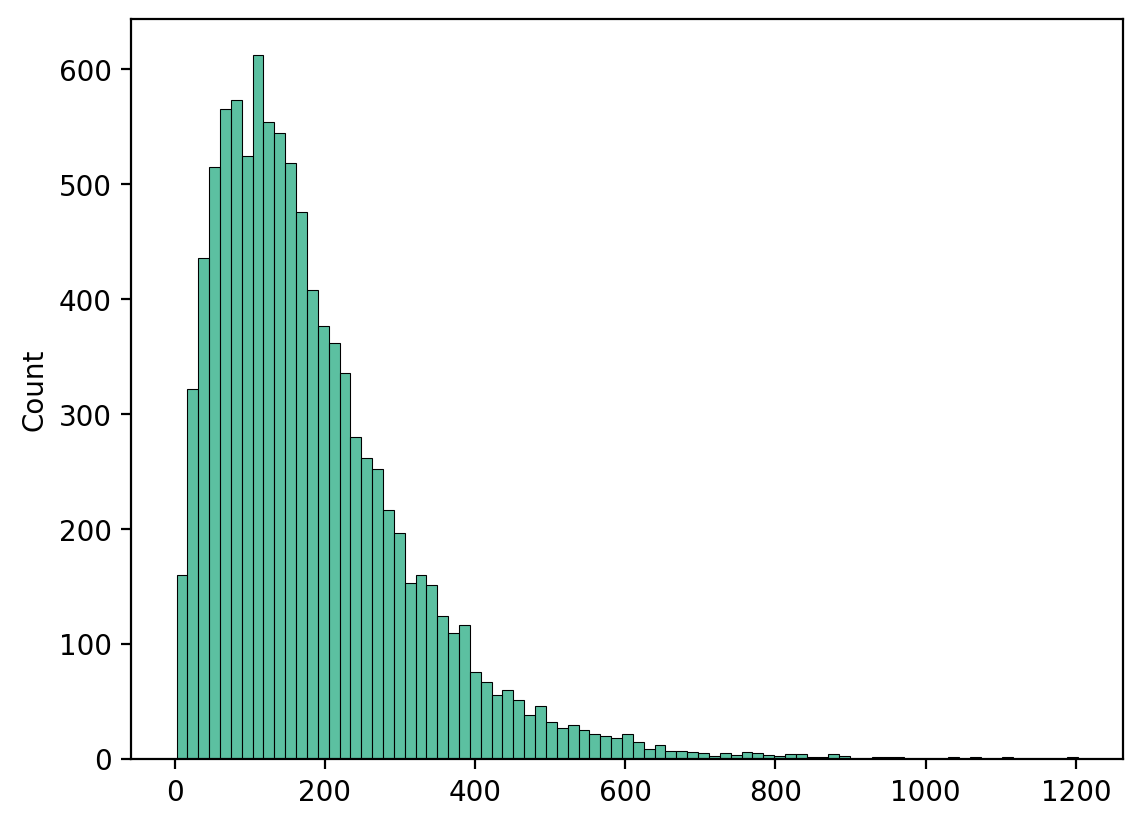

In [25]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5))
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, color="C2", ax=ax)

np.mean(sample_vars)

225.7161343843692

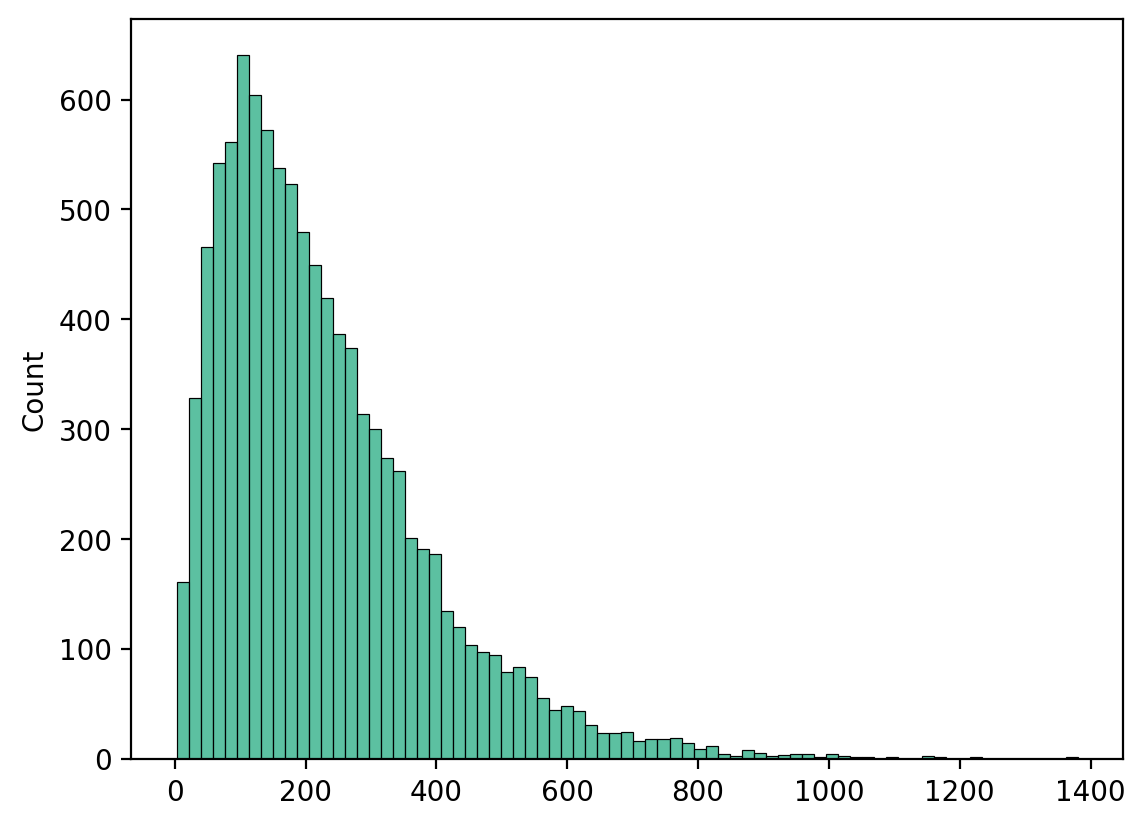

In [26]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5), ddof=1)
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, color="C2", ax=ax)

np.mean(sample_vars)

In [27]:
%load_ext watermark
%watermark -n -u -v -iv 

Last updated: Mon Oct 30 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

matplotlib: 3.8.0
pandas    : 2.1.1
numpy     : 1.25.2
arviz     : 0.16.1
scipy     : 1.11.3
seaborn   : 0.13.0

